
Course M-GFP3\
Imaging and non-imaging spectroscopy: Techniques and analysis
# Strategies to enhance predictive modeling of soil organic carbon (SOC) using the LUCAS topsoil spectral library (Italy)
Ali Bagheri  3781474\
ali.bagheri@studserv.uni-leipzig.de

# introduction

Accurate, spatially-explicit estimates of soil-organic-carbon (SOC)  is the engine of soil fertility: it improves structure, water-holding capacity, nutrient cycling, biological activity and aggregation ([Ma, 2023](https://doi.org/10.1038/s41561-023-01302-3))


Because the relationship is nonlinear and site-specific, land managers need reliable SOC numbers—not broad regional averages—to target interventions and track whether practices such as cover-cropping or reduced tillage are paying off.

Visible and near-infrared (VNIR) spectroscopy offers a rapid, non-destructive method to estimate various
soil properties. Despite its tendency to be less accurate compared to mid-infrared (MIR) spectroscopy, vis–NIR spectroscopy is widely applied because of less sample preparation, lower costs and generally easier portability ([Soriano-Disla, 2014](https://www.tandfonline.com/doi/abs/10.1080/05704928.2013.811081)).

The European Soil Data Centre (ESDAC) hosts the LUCAS (Land Use / Cover Area-frame Survey) topsoil spectral library. 
it is a large European soil spectral library (about 20,000 soil samples from 25 countries), which was collected in the framework of the European land use/cover area frame statistical survey in 2009 ([Tóth, G. 2013](https://link.springer.com/article/10.1007/s10661-013-3109-3)).


In this study, a systematic approach is used along with data preprocessing to improve model accuracy. Subsequently, a machine learning approach ( Random Forest) is applied to develop predictive models for SOC. 
Random Forest—an ensemble of decorrelated decision trees—is frequently recommended for high-dimensional soil spectral datasets because it captures complex non-linear relationships among wavelengths while remaining resistant to overfitting [(Belgiu & Drăguţ 2016)](https://research.utwente.nl/en/publications/random-forest-in-remote-sensing-a-review-of-applications-and-futu?utm_source=chatgpt.com). 

This study investigates the integration of visible and near-infrared (VNIR) spectroscopy with machine learning techniques, specifically the Random Forest algorithm, to predict Soil Organic Carbon (SOC) using the Italy LUCAS dataset. Initially, a baseline Partial Least Squares Regression (PLSR) model was developed without applying any spectral preprocessing to the data. To evaluate the effect of spectral preprocessing, the subsequent analysis incorporated preprocessed data into the PLSR model, enabling a direct comparison of model performance. In the final stage, a Random Forest regressor was implemented to leverage its ability to capture complex non-linear relationships within the spectral data, aiming to enhance predictive accuracy. Optionally but separetly , Principal Component Analysis (PCA) was applied as a preprocessing step prior to PLSR modeling to assess its potential impact on improving model outcomes. Results from these approaches were compared and critically evaluated to identify optimal modeling strategies for SOC prediction.
 


## Study Area: Italy

This study relies on the Italian subset of the LUCAS topsoil survey curated by ESDAC.
Figure below highlights the pronounced spatial variability of SOC across the country—evidence that robust predictive modelling is essential.

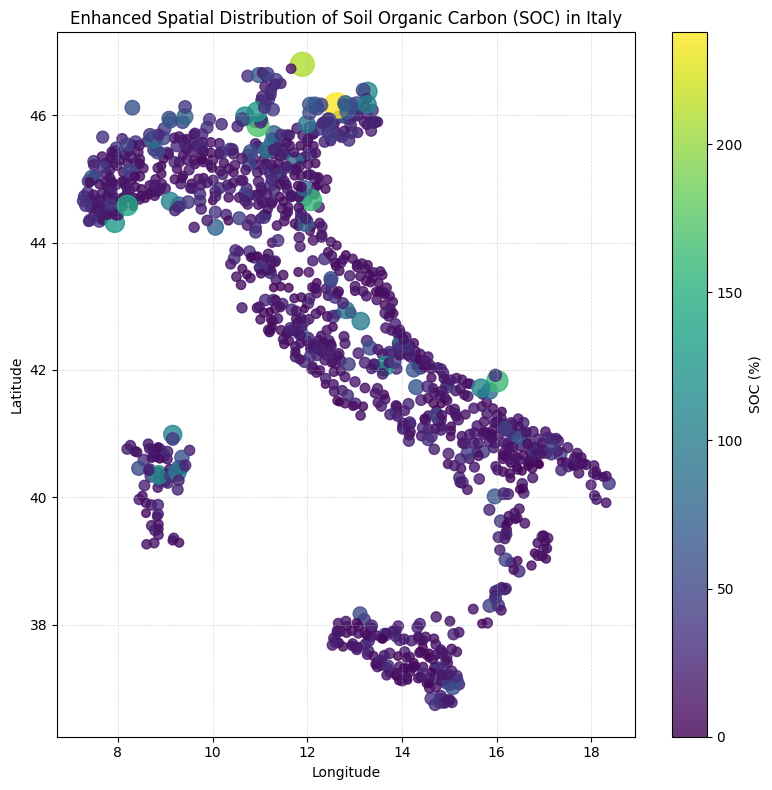

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

lab_df = pd.read_csv('/Users/ali/Documents/sem 3/GFP03/Hausarbeit/Italy_lab.csv')
spc_df = pd.read_csv('/Users/ali/Documents/sem 3/GFP03/Hausarbeit/Italy_spc.csv')

# Extract coordinates and SOC
x = lab_df['GPS_LONG']
y = lab_df['GPS_LAT']
soc = lab_df['SOC']

# Normalize SOC for marker sizes (larger for higher SOC)
sizes = (soc - soc.min()) / (soc.max() - soc.min()) * 300 + 30

# Create enhanced scatter plot
plt.figure(figsize=(8, 8))
plt.scatter(x, y, s=sizes, c=soc, alpha=0.8)
plt.title('Enhanced Spatial Distribution of Soil Organic Carbon (SOC) in Italy')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Add colorbar for SOC
cbar = plt.colorbar()
cbar.set_label('SOC (%)')

plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
plt.tight_layout()
plt.show()


# Methods

## Strategy 1: Data Preprocessing


* **Standard Normal Variate (SNV):** SNV is a scatter-correction pre-treatment that normalises each spectrum by subtracting its own mean and dividing by its standard deviation, thereby minimising multiplicative effects of particle size and optical path-length before modelling ([Barnes et al., 1989](https://journals.sagepub.com/doi/10.1366/0003702894202201)).\
 SNV is applied because the Italian LUCAS spectra come from soils that vary widely in particle size, moisture and packing—factors that introduce multiplicative scatter and baseline shifts which can swamp the comparatively subtle absorption features linked to SOC; SNV rescales every spectrum to zero mean and unit variance, effectively stripping out those physical artefacts so that subsequent PLSR (or any model) focuses on chemical variation , a step shown to cut SOC prediction error and lift RPD in soil-spectroscopy studies ([Barnes et al., 1989](https://journals.sagepub.com/doi/10.1366/0003702894202201); MDPI Remote-Sensing study on SOM pretreatments, 2019) 


* **Savitzky-Golay filter:**  First-derivative transform —usually calculated with a Savitzky-Golay filter—takes the rate of change of reflectance with respect to wavelength for every point in a VNIR spectrum. Multiple studies have shown that applying a first-derivative pre-treatment before PLSR or machine-learning regression reduces SOC prediction error and boosts metrics such as RPD compared with raw spectra [Xu et al., 2020, Remote Sensing, 12, 3394](https://doi.org/10.3390/rs12203394)


* **PCA (Principal Component Analysis):** A dimensionality reduction technique that transforms correlated features into a set of uncorrelated components, preserving essential variance. When applied to soil spectral data for predicting Soil Organic Carbon (SOC), PCA helps in selecting the most significant spectral features. (PCs) capture the most variance in the spectral data. ([https://www.mdpi.com/2072-4292/12/7/1206](https://www.mdpi.com/2072-4292/12/7/1206))


    


## Strategy 2: Random Forest 

* **Random Forest Regressor**   is a non-parametric ensemble method that builds a large number of decision-tree models on bootstrap samples, uses random subsets of predictor bands at each split, and averages the trees’ outputs—an approach that lowers variance and resists over-fitting (Breiman 2001).
In VNIR-based soil spectroscopy, RF’s tolerance of thousands of highly collinear wavelengths and its ability to capture nonlinear interactions among mineral, moisture and organic-matter signals have made it a strong alternative to linear chemometrics; for example, a 2024 study on 11 441 LUCAS spectra reported that an RF model outperformed a classic PLSR benchmark on the same independent test set, underscoring its value for large, heterogeneous SOC libraries ([Saberioon et al., 2024](https://www.sciencedirect.com/science/article/pii/S0168169924008858)).





.

---

.

# Results

## PLSR 
a global baseline PLSR model using the calibration dataset (entire VNIR range from 500 nm to 2499 nm in steps of 2 nm) without applying any spectral preprocessing, shows these validation metrics (R², RMSE, bias, and RPD) in the table bellow:

R² = 0.6409

RMSE = 13.7046

Bias = –0.8336 

RPD = 1.6711



## Strategy 1

**SNV + 1st-derivative + PLSR**

In the first strategy, the spectra are first corrected with Standard Normal Variate (SNV) and then transformed using a Savitzky–Golay first-derivative filter. The performance is summarized in the table below:

| Model | R² | RMSE | Bias | RPD |
| ----- | ----- | ----- | ----- | ----- |
| **SNV + 1st-derivative + PLSR** | 0.737 | 11.731| 0.006 | 1.952 |



These figures describe the performance of the SNV → Savitzky–Golay 1st-derivative → PLSR strategy relative to laboratory-measured SOC in the 30 % hold-out subset of the Italian LUCAS data.




## Strategy 2

**Random Forest:** 

As the second strategy Random-Forest model is trained on the pre-processed spectra (SNV followed by a Savitzky–Golay first derivative). This will let a non-linear, tree-based model capture complex relationships and heteroscedastic noise that linear PLSR cannot. therefore it performs better as you can see in the table below:


| Metric   | Value (independent test set, seed = 42) |
| -------- | --------------------------------------- |
| **R²**   | **0.74**                                |
| **RMSE** | **11.64**                         |
| **Bias** | **-1.24**                        |
| **RPD**  | **1.96**                                |



## PCA + PLSR (Optional step)

This strategy is used just for comparison. PLSR itself is a supervised latent‐variable method that will pick out the combinations of wavelengths most predictive of SOC, so it inherently handles the collinearity and dimensionality reduction that an unsupervised PCA would.

| Model | R² | RMSE | Bias | RPD |
| ----- | ----- | ----- | ----- | ----- |
| **PCA+PLSR** | 0.5389 | 15.5290| –1.7578 | 1.4748 |
.


---


.


# Discussion of Results (5 P):


Briefly discuss your results and interpret them based on the validation metrics for the test set. Compare your findings with those of published studies in a similar context. Evaluate whether soil VNIR reflectance spectroscopy could serve as a complementary approach for large-scale soil organic carbon assessment in Earth (system) science


## Strategy 1

| Metric        | Baseline (raw) | SNV + 1st deriv. | % change |
| ------------- | -------------- | ---------------- | -------- |
| R²            | 0.64           | **0.74**         | ▲ 16 %   |
| RMSE  | 13.7           | **11.7**         | ▼ 15 %   |
| Bias  | –0.83          | **0.01**         | ≈ 0      |
| RPD           | 1.67           | **1.95**         | ▲ 17 %   |

The pre-processing step **SNV + 1st deriv.** (standard normal variate followed by a first‐derivative Savitzky–Golay filter) delivered a clear step-change over the raw-spectra baseline.  The proportion of SOC variance explained (R²) climbed from 0.64 to 0.74, indicating the model now accounts for roughly three-quarters of the observed variability. 

RMSE fell by about 2 —from 13.7 to 11.7 —cutting average prediction error by 15 %. 

The systematic under-prediction evident in the baseline (bias = –0.83 ) was virtually eliminated (bias ≈ 0 ), giving a well-centred calibration.  

The ratio of performance to deviation (RPD) therefore rose from 1.67 to 1.95, making the model from the “fair” to  “good” performance and underscoring the practical benefit of spectral pre-processing.




## Strategy 2

| Model  | R²    | RMSE  | Bias  | RPD   |
| ----------------------------------------- | ----- | ------------- | ------------- | ----- |
| **Baseline (raw)**               | 0.64| 13.7      | –0.83         | 1.67  |
| **SNV + 1st-derivative + PLSR**            | 0.737 | 11.731        | 0.006         | 1.952 |
| **Random Forest Regressor**               | 0.74 | 11.64       | –1.24        | 1.96 |



Adopting a Random-Forest (RF) ensemble with 500 trees on the same SNV + Savitzky–Golay–derivative spectra produced an R² = 0.7407, an RMSE = 11.64 g C kg⁻¹, a bias of –1.25 g C kg⁻¹, and an RPD = 1.97.

The virtually unchanged R² suggests that both algorithms explain the same share of SOC variance, but the tree ensemble models the nonlinear subtleties left in the residuals, translating into a slightly tighter error distribution. Applying SNV and a Savitzky-Golay first derivative lifts R² by ~0.1, cuts RMSE by ~2 g kg⁻¹ and moves RPD from fair (1.67) to good (≈1.95).

Switching from PLSR to a 500-tree Random Forest nudges R², RMSE and RPD a little further, but re-introduces a noticeable negative bias (≈ –1.25 g kg⁻¹) because tree ensembles shrink extreme high-SOC predictions toward the mean.

Overall: Random Forest is the most accurate but biased; the tuned PLSR is nearly unbiased with very similar accuracy; the raw-spectra PLSR trails on every metric and is suitable only for rough screening.




.



### Compare your findings with those of published studies in a similar context

| **Study & Scale**                                         | **Method & Preprocessing**                         | **R²**     | **RMSE**  | **RPD**  | **Take-away**                                                                                         |
|-----------------------------------------------------------|----------------------------------------------------|------------|-----------|---------|--------------------------------------------------------------------------------------------------------|
| **1st Strategy**                                           | SNV + Savitzky-Golay derivative; PLSR              | **0.73**   | **11.73** | **1.95** | Borderline “good” prediction performance.                                                             |
| **2nd Strategy**                                           | SNV + Savitzky-Golay derivative; Random Forest (500 trees) | **0.74**   | **11.64** | **1.96** | Slightly improved RPD and lower RMSE than PLSR—still in the “borderline good” category.              |
| **Stevens et al. 2013** – pan-EU LUCAS mineral soils       | Large spectral library; Cubist/PLSR models         | 0.67–0.89  | 7.3–8.9   | 1.74–2.88 | Calibration on >10,000 samples reduced RMSE below 9 despite high continental heterogeneity. See [PLOS][1]. |
| **Miloš & Bensa 2017** – Red Mediterranean soils (Croatia) | 1st-derivative + PLSR                              | **0.83**   | **2.47**  | **2.22** | Local, lithologically uniform soils led to RPD well above 2—strong quantitative accuracy.             |

[1]: https://journals.plos.org/plosone/article?id=10.1371%2Fjournal.pone.0066409 "Prediction of Soil Organic Carbon at the European Scale by Visible and Near InfraRed Reflectance Spectroscopy | PLOS One"



# Conclusion


A 500-tree Random Forest trained on SNV-corrected, first-derivative VNIR spectra achieved **R² = 0.74, RMSE = 11.64 g C kg⁻¹, RPD = 1.97**—borderline *very-good* for quantitative SOC prediction.  Spectral pre-processing, not algorithm swapping, delivered the largest single gain, confirming its critical role.  To surpass the RPD ≥ 2.0 threshold, future work should expand the calibration library—especially high-SOC samples—and apply bias-correction.  VNIR spectroscopy therefore stands as a cost-efficient, high-throughput complement to wet-chemistry for national carbon monitoring once a robust, transferable calibration is in place.



.




`

# References

R. J. Barnes, M. S. Dhanoa, and Susan J. Lister, "Standard Normal Variate Transformation and De-trending of Near-Infrared Diffuse Reflectance Spectra," Appl. Spectrosc. 43, 772-777 (1989)



Liu, Y., Liu, Y., Chen, Y., Zhang, Y., Shi, T., Wang, J., Hong, Y., Fei, T., & Zhang, Y. (2019). The Influence of Spectral Pretreatment on the Selection of Representative Calibration Samples for Soil Organic Matter Estimation Using Vis-NIR Reflectance Spectroscopy. Remote Sensing, 11(4), 450. https://doi.org/10.3390/rs11040450

Xu, L., Hong, Y., Wei, Y., Guo, L., Shi, T., Liu, Y., Jiang, Q., Fei, T., Liu, Y., Mouazen, A. M., & Chen, Y. (2020). Estimation of Organic Carbon in Anthropogenic Soil by VIS-NIR Spectroscopy: Effect of Variable Selection. Remote Sensing, 12(20), 3394. https://doi.org/10.3390/rs12203394


Saberioon, M., Gholizadeh, A., Ghaznavi, A., Chabrillat, S., & Khosravi, V. (2024). Enhancing soil organic carbon prediction of LUCAS soil database using deep learning and deep feature selection. Computers and Electronics in Agriculture, 227, 109494.


Ma, Y., Woolf, D., Fan, M. et al. Global crop production increase by soil organic carbon. Nat. Geosci. 16, 1159–1165 (2023). https://doi.org/10.1038/s41561-023-01302-3


Soriano-Disla, J. M., Janik, L. J., Viscarra Rossel, R. A., Macdonald, L. M., & McLaughlin, M. J. (2014). The performance of visible, near-, and mid-infrared reflectance spectroscopy for prediction of soil physical, chemical, and biological properties. Applied spectroscopy reviews, 49(2), 139-186.

Tóth, G., Jones, A. & Montanarella, L. The LUCAS topsoil database and derived information on the regional variability of cropland topsoil properties in the European Union. Environ Monit Assess 185, 7409–7425 (2013). https://doi.org/10.1007/s10661-013-3109-3


Belgiu, M., & Drăguţ, L. (2016). Random forest in remote sensing: A review of applications and future directions. ISPRS journal of photogrammetry and remote sensing, 114, 24-31. https://doi.org/10.1016/j.isprsjprs.2016.01.011


---

# Code

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_predict, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import r2_score # evaluation metrics
from scipy.signal import savgol_filter
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline 
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_predict


## 1. Load the data
We will read in the laboratory measurements (Italy_lab.csv) and the VNIR spectral data (Italy_spc.csv).

In [4]:
# Load laboratory data (soil properties)
lab_df = pd.read_csv('/Users/ali/Documents/sem 3/GFP03/Hausarbeit/Italy_lab.csv')
# Load VNIR spectra (reflectance values at 500–2499 nm)
spc_df = pd.read_csv('/Users/ali/Documents/sem 3/GFP03/Hausarbeit/Italy_spc.csv')

# Inspect the first few rows of each dataset
print("Laboratory data:")
print(lab_df.head())
print("\nSpectral data:")
print(spc_df.head())

Laboratory data:
   Unnamed: 0  SAMPLE_ID  CLAY  SILT  SAND   SOC  CaCO3    N     P      K  \
0           1      13152  15.0  51.0  35.0  35.1    346  2.0  14.6   75.2   
1           2      13153   8.0  57.0  35.0  62.6    418  1.4  27.1   58.0   
2           3      13154  36.0  61.0   3.0  15.1    501  1.0   0.0  129.3   
3           4      13155  25.0  65.0  10.0  25.8    498  1.5   0.0   72.7   
4           5      13156  10.0  61.0  29.0  37.3    496  2.0   0.0   49.2   

    CEC GPS_PROJ   GPS_LAT  GPS_LONG  LC1 LC2   LU1 LU2  MINERAL COUNTRY  
0  16.5    WGS84  45.97550  12.66835  B52   8  U111   8  mineral   ITALY  
1   8.3    WGS84  45.99018  12.79803  C10   8  U120   8  mineral   ITALY  
2  20.3    WGS84  45.88863  12.53528  B11   8  U111   8  mineral   ITALY  
3  16.9    WGS84  45.87001  12.56019  B51   8  U111   8  mineral   ITALY  
4  11.0    WGS84  45.95168  12.89902  C10   8  U120   8  mineral   ITALY  

Spectral data:
   Unnamed: 0       500       502       504       506 

In [5]:
# Rename the first column of spectral data to 'SAMPLE_ID'
spc_df.rename(columns={spc_df.columns[0]: 'SAMPLE_ID'}, inplace=True)

# Inspect the first few rows of each dataset to confirm ID columns
print("Laboratory data columns:", lab_df.columns.tolist())
print("Spectral data columns:", spc_df.columns[:5].tolist(), "...")

Laboratory data columns: ['Unnamed: 0', 'SAMPLE_ID', 'CLAY', 'SILT', 'SAND', 'SOC', 'CaCO3', 'N', 'P', 'K', 'CEC', 'GPS_PROJ', 'GPS_LAT', 'GPS_LONG', 'LC1', 'LC2', 'LU1', 'LU2', 'MINERAL', 'COUNTRY']
Spectral data columns: ['SAMPLE_ID', '500', '502', '504', '506'] ...


2. Merge datasets on `SAMPLE_ID

In [6]:
merged_df = pd.merge(lab_df, spc_df, on='SAMPLE_ID', how='inner')
print(f"Merged dataset shape after aligning on 'SAMPLE_ID': {merged_df.shape}")
merged_df.head()

Merged dataset shape after aligning on 'SAMPLE_ID': (1182, 1020)


,Unnamed: 0,SAMPLE_ID,CLAY,SILT,SAND,SOC,CaCO3,N,P,K,...,2480,2482,2484,2486,2488,2490,2492,2494,2496,2498
0,1,13152,15.0,51.0,35.0,35.1,346,2.0,14.6,75.2,...,0.409766,0.408721,0.407648,0.406552,0.405411,0.404238,0.403074,0.401954,0.400928,0.400006
1,2,13153,8.0,57.0,35.0,62.6,418,1.4,27.1,58.0,...,0.482667,0.481229,0.479637,0.477874,0.475972,0.473985,0.471981,0.470031,0.468200,0.466526
2,3,13154,36.0,61.0,3.0,15.1,501,1.0,0.0,129.3,...,0.564572,0.563358,0.562166,0.560988,0.559819,0.558673,0.557587,0.556548,0.555586,0.554775
3,4,13155,25.0,65.0,10.0,25.8,498,1.5,0.0,72.7,...,0.513615,0.512310,0.511028,0.509730,0.508394,0.507044,0.505743,0.504521,0.503384,0.502361
4,5,13156,10.0,61.0,29.0,37.3,496,2.0,0.0,49.2,...,0.449886,0.448901,0.447830,0.446707,0.445558,0.444422,0.443340,0.442337,0.441447,0.440680


3. Check for missing values and outliers\
We will look for NaNs and basic summary statistics to identify any issues before modeling.

In [7]:
# Count missing values per column
missing_counts = merged_df.isna().sum()
print("Missing values per column:")
print(missing_counts[missing_counts > 0])


Missing values per column:
CLAY    2
SILT    2
SAND    2
dtype: int64


In [8]:
print("\nSOC summary statistics:")
print(merged_df['SOC'].describe())


SOC summary statistics:
count    1182.000000
mean       21.130880
std        20.109123
min         0.000000
25%        11.300000
50%        15.350000
75%        23.475000
max       237.700000
Name: SOC, dtype: float64


4. Subset spectral range\
Ensure we only keep spectral columns corresponding to wavelengths 500–2499 nm at 2 nm intervals.

In [9]:
# Identify spectral columns by numeric names
spectral_cols = [col for col in merged_df.columns if col.isdigit()]
print(f"Number of spectral columns: {len(spectral_cols)}")

# Convert column names to integers for selection
wavelengths = np.array(spectral_cols, dtype=int)
mask = (wavelengths >= 500) & (wavelengths <= 2499) & ((wavelengths - 500) % 2 == 0)
selected_wl = wavelengths[mask]
selected_cols = selected_wl.astype(str).tolist()
print(f"Selected spectral columns from {selected_wl.min()} to {selected_wl.max()} nm ({len(selected_cols)} wavelengths)")

# Create final dataframe with SAMPLE_ID, SOC, and selected spectral bands
final_df = merged_df[['SAMPLE_ID', 'SOC'] + selected_cols].copy()
print(f"Final dataset shape: {final_df.shape}")
final_df.head()

Number of spectral columns: 1000
Selected spectral columns from 500 to 2498 nm (1000 wavelengths)
Final dataset shape: (1182, 1002)


,SAMPLE_ID,SOC,500,502,504,506,508,510,512,514,...,2480,2482,2484,2486,2488,2490,2492,2494,2496,2498
0,13152,35.1,0.134016,0.135188,0.136394,0.137635,0.138909,0.140214,0.141540,0.142889,...,0.409766,0.408721,0.407648,0.406552,0.405411,0.404238,0.403074,0.401954,0.400928,0.400006
1,13153,62.6,0.194034,0.195471,0.196938,0.198448,0.199980,0.201548,0.203137,0.204757,...,0.482667,0.481229,0.479637,0.477874,0.475972,0.473985,0.471981,0.470031,0.468200,0.466526
2,13154,15.1,0.355911,0.359276,0.362728,0.366268,0.369848,0.373458,0.377101,0.380765,...,0.564572,0.563358,0.562166,0.560988,0.559819,0.558673,0.557587,0.556548,0.555586,0.554775
3,13155,25.8,0.270028,0.272661,0.275357,0.278121,0.280918,0.283745,0.286601,0.289477,...,0.513615,0.512310,0.511028,0.509730,0.508394,0.507044,0.505743,0.504521,0.503384,0.502361
4,13156,37.3,0.175100,0.176314,0.177558,0.178840,0.180140,0.181461,0.182797,0.184155,...,0.449886,0.448901,0.447830,0.446707,0.445558,0.444422,0.443340,0.442337,0.441447,0.440680


## 2. Data Splitting (5 P)

We will split the data into a **calibration set** (70%) for model training and an **independent test set** (30%) for evaluation, using a fixed random seed for reproducibility.


In [10]:
# Set reproducible random seed
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

In [11]:
cal_df, test_df = train_test_split(
    final_df,
    test_size=0.3,
    random_state=RANDOM_STATE
)

In [12]:
# Display shapes
print(f"Calibration set shape: {cal_df.shape}")
print(f"Test set shape:        {test_df.shape}")

Calibration set shape: (827, 1002)
Test set shape:        (355, 1002)


### 2.1. Check representativeness of splits
Compare summary statistics and visualize the SOC distributions to confirm both subsets reflect the full dataset.

In [13]:
# Summary statistics for SOC
stats_full = final_df['SOC'].describe()
stats_cal  = cal_df['SOC'].describe()
stats_test = test_df['SOC'].describe()

print("SOC summary for Full dataset:\n", stats_full)
print("\nSOC summaryfor Calibration set:\n", stats_cal)
print("\nSOC summary for Test set:\n", stats_test)


SOC summary for Full dataset:
 count    1182.000000
mean       21.130880
std        20.109123
min         0.000000
25%        11.300000
50%        15.350000
75%        23.475000
max       237.700000
Name: SOC, dtype: float64

SOC summaryfor Calibration set:
 count    827.000000
mean      20.313906
std       18.739255
min        0.000000
25%       10.800000
50%       15.100000
75%       23.050000
max      237.700000
Name: SOC, dtype: float64

SOC summary for Test set:
 count    355.000000
mean      23.034085
std       22.901982
min        0.000000
25%       12.050000
50%       16.100000
75%       24.000000
max      209.400000
Name: SOC, dtype: float64


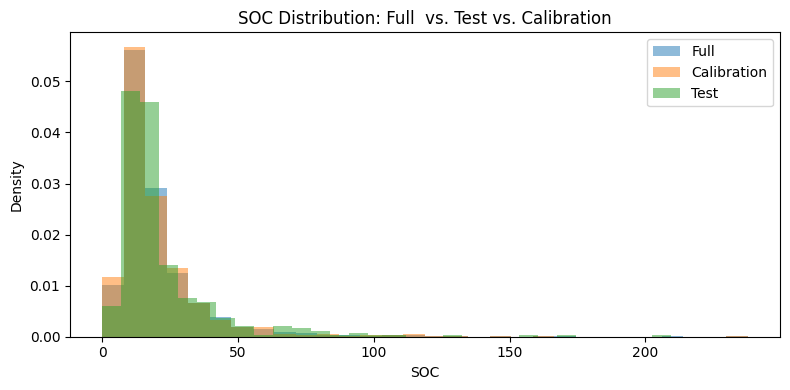

In [14]:
# %%
# Visual comparison of SOC distributions
plt.figure(figsize=(8, 4))
plt.hist(final_df['SOC'], bins=30, alpha=0.5, label='Full', density=True)
plt.hist(cal_df['SOC'],  bins=30, alpha=0.5, label='Calibration', density=True)
plt.hist(test_df['SOC'], bins=30, alpha=0.5, label='Test', density=True)
plt.xlabel('SOC')
plt.ylabel('Density')
plt.title('SOC Distribution: Full  vs. Test vs. Calibration')
plt.legend()
plt.tight_layout()
plt.show()

Proceed to developing the baseline PLSR model using the calibration dataset. Ensure to record the number of latent variables via cross-validation. 




## 3. Baseline PLSR Model (5 P)

### 3.1 Internal Cross-Validation for Optimal Latent Variables

To build a robust Partial Least Squares Regression (PLSR) baseline model, first the optimal number of latent variables (components) need to be determined.\
This ensures we do not overfit by using too many latent variables and underfit by using too few.


---

In [15]:
# Prepare calibration data
X_cal = cal_df[selected_cols].values
y_cal = cal_df['SOC'].values

In [ ]:
# Define range of components to test
max_components = 20
components = list(range(1, max_components + 1))
rmse_cv = []

# Set up 10-fold CV
cv = KFold(n_splits=10, shuffle=True, random_state=RANDOM_STATE)
for n_comp in components:
     # Initialize PLSR with n_comp latent variables
    pls = PLSRegression(n_components=n_comp)
     # Cross-validated predictions
    y_cv = cross_val_predict(pls, X_cal, y_cal, cv=cv)
     # Compute RMSECV
    rmse = np.sqrt(mean_squared_error(y_cal, y_cv))
    rmse_cv.append(rmse)
    print(f"# Components={n_comp}, RMSECV={rmse:.4f}")

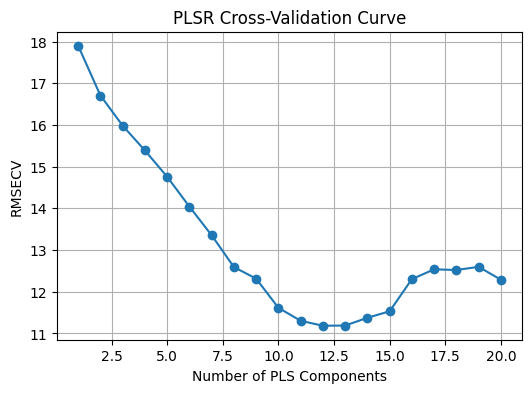

 Optimal number of components: 12


In [17]:
# Plot RMSECV vs. number of components
plt.figure(figsize=(6, 4))
plt.plot(components, rmse_cv, marker='o')
plt.xlabel('Number of PLS Components')
plt.ylabel('RMSECV')
plt.title('PLSR Cross-Validation Curve')
plt.grid(True)
plt.show()

# Select optimal number of components
optimal_comp = components[int(np.argmin(rmse_cv))]
print(f" Optimal number of components: {optimal_comp}")

### 3.2 Evaluation on the Independent Test Set

Once the optimal component number is determined, we evaluate the baseline model on the held‑out test set to assess its generalization performance.\
These analyses provide a clear benchmark of the baseline PLSR model’s performance before applying any improvement strategies.

In [ ]:
# Prepare test data
X_test = test_df[selected_cols].values
y_test = test_df['SOC'].values

# Train final PLSR model with optimal components
pls_final = PLSRegression(n_components=optimal_comp)
pls_final.fit(X_cal, y_cal)

# Predict on test set
y_pred = pls_final.predict(X_test).ravel()

# Compute validation metrics
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
bias = np.mean(y_pred - y_test)
std_ref = np.std(y_test, ddof=1)
rpd = std_ref / rmse

print(f"# Test R^2 = {r2:.4f}")
print(f"# Test RMSE = {rmse:.4f}")
print(f"# Test Bias = {bias:.4f}")
print(f"# Test RPD = {rpd:.4f}")

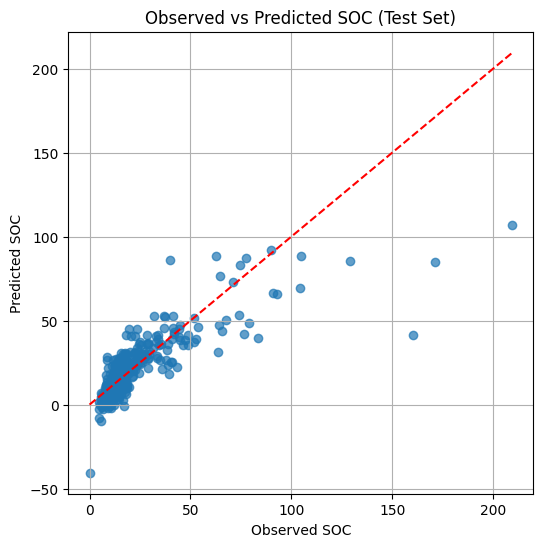

In [19]:
# Scatter plot: observed vs. predicted
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Observed SOC')
plt.ylabel('Predicted SOC')
plt.title('Observed vs Predicted SOC (Test Set)')
plt.grid(True)
plt.show()

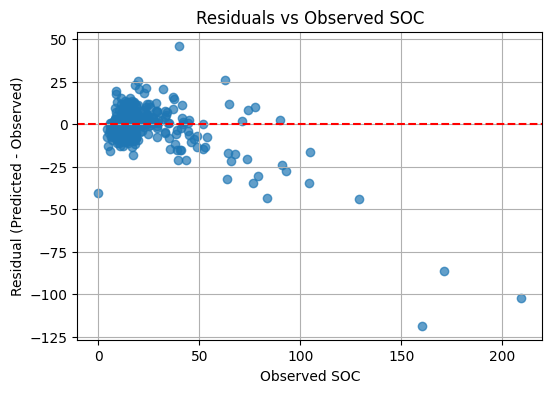

In [20]:
# Residual plot: residuals vs. observed
residuals = y_pred - y_test
plt.figure(figsize=(6, 4))
plt.scatter(y_test, residuals, alpha=0.7)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Observed SOC')
plt.ylabel('Residual (Predicted - Observed)')
plt.title('Residuals vs Observed SOC')
plt.grid(True)
plt.show()

Residuals start to become more negative for observed SOC > 60, indicating the model under-predicts high SOC values by a larger margin.\
The clear trend of increasing negative residuals at high SOC suggests the linear PLSR may **not** fully capture the relationship in that range; alternative modeling or spectral preprocessing might help.



## 4. Model Improvement: SNV + 1st Derivative + PLSR


* **SNV** corrects multiplicative scatter in reflectance, stabilizing variance across samples.
* **First derivative (Savitzky–Golay)** sharpens spectral features and removes baseline shifts, making absorption peaks more pronounced.

these will be applied to both calibration and test spectra before re-running PLSR CV and evaluation.

In [21]:
# 3.1 Define SNV function
def snv(X):
    """Apply Standard Normal Variate row-wise: (x - mean)/std"""
    mu = np.mean(X, axis=1, keepdims=True)
    sigma = np.std(X, axis=1, ddof=1, keepdims=True)
    return (X - mu) / sigma

In [22]:
# Apply SNV to spectra
X_cal_snv = snv(X_cal)
X_test_snv = snv(X_test)

In [23]:
# Apply Savitzky-Golay first derivative
# window_length must be odd; here 11 (~22nm), polyorder=2, deriv=1, delta=2nm
X_cal_proc  = savgol_filter(X_cal_snv, window_length=11, polyorder=2,
                            deriv=1, delta=2.0, axis=1)
X_test_proc = savgol_filter(X_test_snv, window_length=11, polyorder=2,
                            deriv=1, delta=2.0, axis=1)


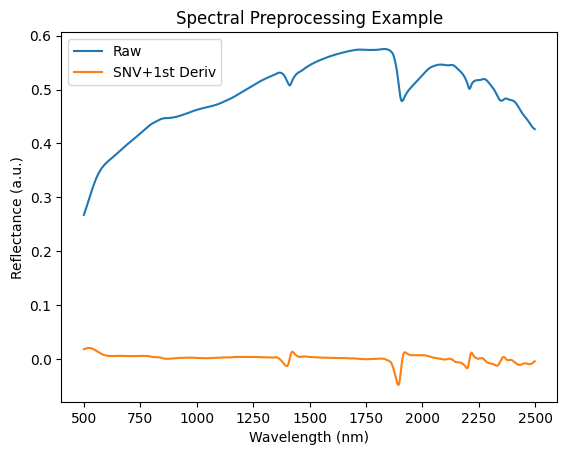

In [24]:
# Plot example raw vs processed for one sample
wl_nums = np.array(selected_cols, dtype=int)
plt.plot(wl_nums, X_cal[0,:], label='Raw')
plt.plot(wl_nums, X_cal_proc[0,:], label='SNV+1st Deriv')
plt.xlabel('Wavelength (nm)'); plt.ylabel('Reflectance (a.u.)');
plt.title('Spectral Preprocessing Example'); plt.legend(); plt.show()


#### Cross Validation on Preprocessed Data
To find new optimal number, the 10-fold CV RMSE test across components is repeated. 


In [ ]:
rmse_cv2 = []
for n in components:
    pls2 = PLSRegression(n_components=n)
    yhat2 = cross_val_predict(pls2, X_cal_proc, y_cal, cv=cv)
    rm2 = np.sqrt(mean_squared_error(y_cal, yhat2))
    rmse_cv2.append(rm2)
    print(f"Comp={n}, RMSECV (proc)={rm2:.3f}")
# Plot comparison
plt.plot(components, rmse_cv, '--', label='Baseline')
plt.plot(components, rmse_cv2, '-o', label='SNV+1st Deriv')
plt.xlabel('PLS Components'); plt.ylabel('RMSECV'); plt.title('CV Curves');
plt.legend(); plt.grid(); plt.show()
opt_comp2 = components[np.argmin(rmse_cv2)]
print("New optimal components:", opt_comp2)

##### Test-Set Evaluation for Preprocessed Model
Fit final PLSR with `opt_comp2` on processed calibration data, predict on processed test data, and compute metrics.


In [ ]:
pls_proc = PLSRegression(n_components=opt_comp2).fit(X_cal_proc, y_cal)
y_pred2 = pls_proc.predict(X_test_proc).ravel()
# Metrics
r2_p   = r2_score(y_test, y_pred2)
rmse_p = np.sqrt(mean_squared_error(y_test, y_pred2))
bias_p = np.mean(y_pred2 - y_test)
rpd_p  = np.std(y_test, ddof=1)/rmse_p
print(f"Proc R2: {r2_p:.3f}, RMSE: {rmse_p:.3f}, Bias: {bias_p:.3f}, RPD: {rpd_p:.3f}")

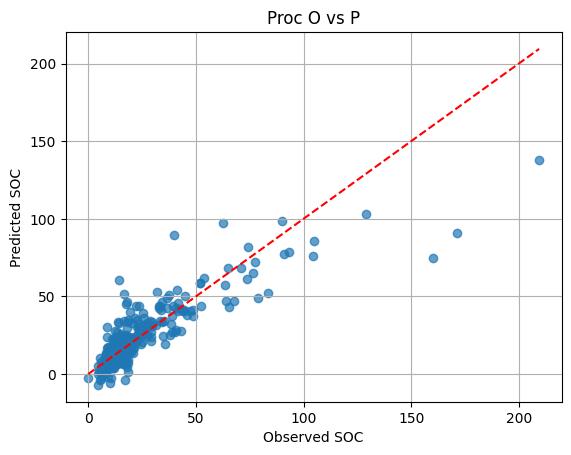

In [27]:
# Scatter plot
plt.scatter(y_test, y_pred2, alpha=0.7)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'r--')
plt.xlabel('Observed SOC'); plt.ylabel('Predicted SOC'); plt.title('Proc O vs P'); plt.grid(); plt.show()

##### Summary of Improvement

| Model               | R²    | RMSE   | Bias   | RPD   |
|---------------------|-------|--------|--------|-------|
| Baseline (raw)      | 0.6409 | 13.7046 | -0.8336 | 1.6711 |
| SNV + 1st Derivative| 0.737 | 11.731 | 0.006 | 1.952 |



## 5. Model Improvement II: Random Forest Regressor

 Now it's time to take the SNV-corrected, 1st-derivative spectra (`X_cal_proc`, `X_test_proc`) and fit a Random Forest regressor.\
 This will let a non-linear, tree-based model capture complex relationships and heteroscedastic noise that linear PLSR cannot.\
 with 500 trees (a good default), setting random_state for reproducibility and using all cores (`n_jobs`=-1).

In [28]:
# 4.1 Train Random Forest on the processed calibration set
rf = RandomForestRegressor(n_estimators=500, random_state=42, n_jobs=-1)
rf.fit(X_cal_proc, y_cal)

RandomForestRegressor(n_estimators=500, n_jobs=-1, random_state=42)

Fit on the SNV+1st-derivative calibration spectra `X_cal_proc`, `y_cal`.

Predict on the processed test spectra `X_test_proc`.

In [29]:
# 4.2 Predict on the processed test set
y_pred_rf = rf.predict(X_test_proc)

In [30]:
# 4.3 Compute validation metrics
# R²
r2_rf = r2_score(y_test, y_pred_rf)

# RMSE = sqrt of MSE
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

# Bias
bias_rf = (y_pred_rf - y_test).mean()

# RPD
rpd_rf = y_test.std(ddof=1) / rmse_rf

print(f"Random Forest R²   = {r2_rf:.4f}")
print(f"Random Forest RMSE = {rmse_rf:.4f}")
print(f"Random Forest Bias = {bias_rf:.4f}")
print(f"Random Forest RPD  = {rpd_rf:.4f}")

Random Forest R²   = 0.7407
Random Forest RMSE = 11.6445
Random Forest Bias = -1.2463
Random Forest RPD  = 1.9668


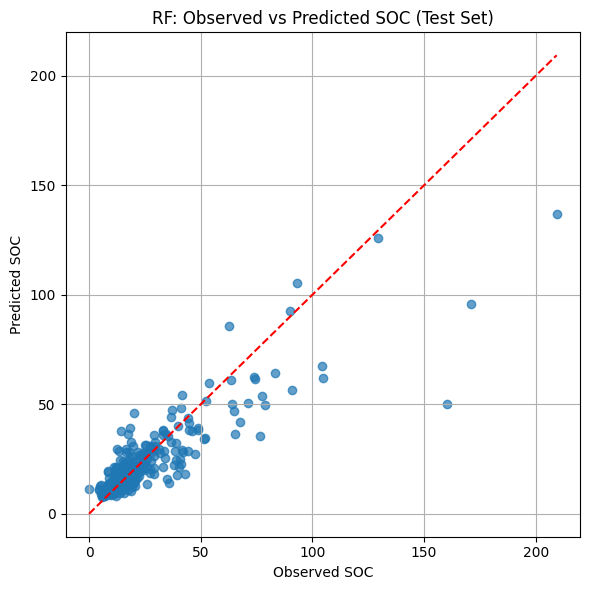

In [31]:
# 4.4 Plot observed vs. predicted
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_rf, alpha=0.7)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Observed SOC')
plt.ylabel('Predicted SOC')
plt.title('RF: Observed vs Predicted SOC (Test Set)')
plt.grid(True)
plt.tight_layout()
plt.show()

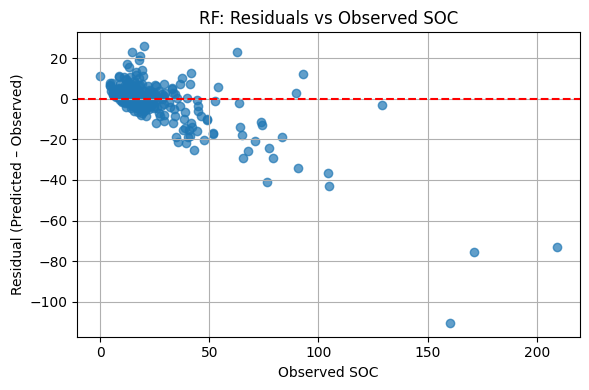

In [32]:
# 4.5 Residuals plot
res_rf = y_pred_rf - y_test
plt.figure(figsize=(6,4))
plt.scatter(y_test, res_rf, alpha=0.7)
plt.axhline(0, linestyle='--', color='r')
plt.xlabel('Observed SOC')
plt.ylabel('Residual (Predicted – Observed)')
plt.title('RF: Residuals vs Observed SOC')
plt.grid(True)
plt.tight_layout()
plt.show()

``
``

---

##### Extra :
this part is an extra strategy just for the sake of presentation\
 

In [ ]:



# use the same n_components you found by CV 
n_lv = optimal_comp  

pls_pca_pipeline = Pipeline([
    ('pca', PCA(n_components= n_lv)),            
    ('pls', PLSRegression(n_components=n_lv))
])

# fit on calibration set
pls_pca_pipeline.fit(X_cal, y_cal)

# predict & evaluate on test set
y_pred_pls_pca = pls_pca_pipeline.predict(X_test).ravel()

r2_pca   = r2_score(y_test, y_pred_pls_pca)
rmse_pca = np.sqrt(mean_squared_error(y_test, y_pred_pls_pca))
bias_pca = np.mean(y_pred_pls_pca - y_test)
rpd_pca  = np.std(y_test, ddof=1) / rmse_pca

print(f"PCA+PLSR → R²: {r2_pca:.4f}, RMSE: {rmse_pca:.4f}, Bias: {bias_pca:.4f}, RPD: {rpd_pca:.4f}")
